# Numpy

## 基本的索引与切片

In [2]:
## Python2.7
import numpy as np

In [2]:
arr = np.arange(10)

In [3]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
arr[5]

5

In [5]:
arr[5:8] = 12

In [6]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

数组的切片是原始数据的视图，这意味着数据不会被复制，视图上的所有修改会反应到源数组上

In [7]:
arr_slice = arr[5:8]

In [8]:
arr_slice[1] = 12345

In [9]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

对于高维数组，各索引位置上的元素不再是标量而是一维数组：

In [10]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

以下两种访问元素的方式是等价的：

In [11]:
print arr2d[0][2]
print arr2d[0, 2]

3
3


在高位数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray（它包含高一级轴上的所有数据）。

下面的例子是一个$2 \times 2 \times 3$的例子，其可以理解成2个$2 \times 3$的数组。式子最左边代表最高维，最右边代表最低维。

In [12]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]],
                  [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [13]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
arr3d.shape

(2L, 2L, 3L)

标量值和数组都可以被赋值给arr3d[0]（不会改变原数组的形状，维度不足的进行广播，维度超出原先范围，则报错）

In [15]:
old_values = arr3d[0].copy()
arr3d[0] = 43

In [16]:
arr3d

array([[[43, 43, 43],
        [43, 43, 43]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [17]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [18]:
test = np.array([4, 8, 3, 5])
arr3d[0] = test
arr3d

ValueError: could not broadcast input array from shape (4) into shape (2,3)

In [19]:
arr3d[1, 0]

array([7, 8, 9])

In [20]:
arr3d[1, 0, 2]

9

### 切片索引

对二维数组执行切片操作，当只给出一个索引值时，此索引值代表最高维度的那个轴，即第0轴。

In [21]:
arr2d[2:]

array([[7, 8, 9]])

下面的情况就是分别在第0轴和第1轴上执行切片操作。

In [22]:
arr2d[:2, 1:]  # 0轴从头取到第1位（:2左闭右开，取不到第2位），1轴从第一位取到最后一位

array([[2, 3],
       [5, 6]])

下面的操作只取特定轴上的特定元素

In [23]:
arr2d[2, 1] # 零轴只取第2位，1轴只取第1位

8

下面的操作对特定的轴取切片操作

In [24]:
arr2d[:2, 1]  # 零轴从头取到第1位，一轴只取第1位

array([2, 5])

只加冒号代表索引整个轴。

In [25]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [26]:
arr3d[:1]

array([[[1, 2, 3],
        [4, 5, 6]]])

### 布尔型索引

假设有一个用于存储数据的数组以及一个存储姓名的数组（含有重复项）。这里，我们使用np.random.randn([shape])函数生成一些正太分布的随机数据：

In [27]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [28]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], 
      dtype='|S4')

In [29]:
data

array([[ 0.92248502, -1.4027103 , -0.47468111,  0.06599716],
       [-0.14660233,  0.49623684, -0.76681961, -0.86897862],
       [-0.41916159, -0.36787735,  0.17645346,  0.58246536],
       [ 0.10352679, -1.2801808 , -0.51459502, -0.01611344],
       [-1.04457665,  0.80534863,  1.05584455,  1.1458688 ],
       [-0.08362149,  0.989539  ,  0.79621873, -0.45837087],
       [ 0.27573554, -0.43920392, -0.71963874,  0.16288806]])

假设每个名字都对应data数组中的一行，而我们想拣选出对应于名字'Bob'的所有行。

In [30]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [31]:
data[names == 'Bob']  # 只显示索引为True的元素。

array([[ 0.92248502, -1.4027103 , -0.47468111,  0.06599716],
       [ 0.10352679, -1.2801808 , -0.51459502, -0.01611344]])

In [32]:
data[names == 'Bob', 3:]  # 在低维轴的边缘加冒号会保留高维轴的值，
                          # 此处高维轴（代表行数的轴）为2被保留。

array([[ 0.06599716],
       [-0.01611344]])

In [33]:
data[names == 'Bob', 3]  # 这里不带冒号，高维轴的值被抹去，返回的值重新组成一个新的低维数组，但其中元素仍是源数组元素的视图。

array([ 0.06599716, -0.01611344])

同理可得：

In [34]:
data[names == 'Bob', :1]

array([[ 0.92248502],
       [ 0.10352679]])

In [35]:
data[names == 'Bob', 0]

array([ 0.92248502,  0.10352679])

可以使用不等号（!=）或负号（-）对条件进行否定，来选取'Bob'以外的其他值。

In [36]:
data[names != 'Bob']

array([[-0.14660233,  0.49623684, -0.76681961, -0.86897862],
       [-0.41916159, -0.36787735,  0.17645346,  0.58246536],
       [-1.04457665,  0.80534863,  1.05584455,  1.1458688 ],
       [-0.08362149,  0.989539  ,  0.79621873, -0.45837087],
       [ 0.27573554, -0.43920392, -0.71963874,  0.16288806]])

In [37]:
data[-(names == 'Bob')]

C:\Anaconda3\envs\python2.7\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  if __name__ == '__main__':


array([[-0.14660233,  0.49623684, -0.76681961, -0.86897862],
       [-0.41916159, -0.36787735,  0.17645346,  0.58246536],
       [-1.04457665,  0.80534863,  1.05584455,  1.1458688 ],
       [-0.08362149,  0.989539  ,  0.79621873, -0.45837087],
       [ 0.27573554, -0.43920392, -0.71963874,  0.16288806]])

**布尔算术符** &：和， |：或，等等。**警告**，Python关键字and和or在布尔型数组中无效。 

In [38]:
mask = (names == 'Bob') | (names == 'Will')
data[mask]

array([[ 0.92248502, -1.4027103 , -0.47468111,  0.06599716],
       [-0.41916159, -0.36787735,  0.17645346,  0.58246536],
       [ 0.10352679, -1.2801808 , -0.51459502, -0.01611344],
       [-1.04457665,  0.80534863,  1.05584455,  1.1458688 ]])

通过布尔型数组设置值是一种经常用到的手段。

In [39]:
data[data < 0] = 0
data

array([[ 0.92248502,  0.        ,  0.        ,  0.06599716],
       [ 0.        ,  0.49623684,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.17645346,  0.58246536],
       [ 0.10352679,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.80534863,  1.05584455,  1.1458688 ],
       [ 0.        ,  0.989539  ,  0.79621873,  0.        ],
       [ 0.27573554,  0.        ,  0.        ,  0.16288806]])

In [40]:
data[names != 'Joe'] = 7
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.        ,  0.49623684,  0.        ,  0.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.        ,  0.989539  ,  0.79621873,  0.        ],
       [ 0.27573554,  0.        ,  0.        ,  0.16288806]])

### 花式索引

花式索引（Fansy indexing）是一个numpy术语，指的是利用整数数组进行索引。

In [41]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

为了以特定顺序选取行子集，只需传入一个用于指定顺序的整数列表或ndarray即可

In [42]:
arr[[4, 3, 0, 6]]  # 分别选群第4， 3， 0 ，6行

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [43]:
 arr[[-3, -5, -7]]  # 分别选取第5， 3， 1行

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

一次传入多个索引数组会有一点特别。它返回的是一个一维数组，其中的元素对应各个索引元组：

In [44]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [45]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

最终选取的元素是(1, 0), (5, 3), (7, 1), (2, 2)。这个结果跟预期不一样。选取子集的行列子集应该是矩形区域才对？ 下面是得到矩形区域的一个办法：

In [46]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]  # 选取1，5，7，2行，与0,3,1,2列的交集

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

还一个办法是使用np.ix\_函数，它可以将两个一维整数数组转换为一个用于选取方形区域的所引器：

In [47]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## 数组的转置和轴对换

转置（transpose）是重塑的一种特殊形式，它返回的是源数据的视图。

In [48]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [49]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [50]:
np.dot(arr.T, arr)  # 计算矩阵内积

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

对于高维数组，transpose需要得到一个由轴编号组成的元组才能对这些轴进行转置（比较费脑子）。

In [51]:
arr = np.arange(16).reshape((2, 2, 4))  # 2个2 x 4的数表
arr  # 此时轴编号为(0, 1, 2)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [52]:
arr.transpose((1,0,2))  # 保持2轴不变，转置0轴和1轴

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [53]:
arr.transpose((0,2,1))  # 保持0轴不变，转置1轴和2轴

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

简单的转置可以使用.T，其实就是对轴进行对换。ndarray还有一个swapaxes方法，它需要接受**一对**轴编号：

In [54]:
arr.swapaxes(1, 2)  # 转置1轴和2轴

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 通用函数：快速的元素级数组函数

ufunc是一种对ndarray中的数据执行元素级运算的函数。可以将其看作简单函数的矢量化包装器。

In [55]:
arr = np.arange(10)
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [56]:
x = np.random.randn(8)
y = np.random.randn(8)

In [57]:
x

array([-0.17197071,  1.11660571, -1.26997689, -0.8726354 , -0.03849194,
        1.26414493,  0.00231446,  1.59637417])

In [58]:
y

array([-0.6640442 , -0.0205447 , -1.18319883, -0.8105077 , -0.25183953,
        0.33856045, -0.82682419,  1.26693033])

In [59]:
np.maximum(x, y)  # 元素级别的返回最大值，并组成新数组。

array([-0.17197071,  1.11660571, -1.18319883, -0.8105077 , -0.03849194,
        1.26414493,  0.00231446,  1.59637417])

In [60]:
arr = np.random.randn(8) * 5
np.modf(arr)  # 这事内建函数divmod的矢量化版本，用于筛选浮点数数组的小数和整数部分。

(array([-0.49500628, -0.61657483,  0.12217292, -0.68409489,  0.34611354,
         0.59069104, -0.4289144 , -0.98652161]),
 array([ -5.,  -1.,   1.,  -4.,   1.,   2.,  -3., -10.]))

有关更多一元/二元ufunc，参看书上99-100页

## 利用数组进行数据处理

用*数组表达式*代替*循环*的做法，被称为**矢量化**。

假设要在一组值（网格型）上计算函数sqrt(x^2 + y^2)。np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所有的(x, y)对）。

In [61]:
points = np.arange(-5, 5, 0.01)  # 范围从-5到5，等间隔0.01取点，共1000点
xs, ys = np.meshgrid(points, points)
ys  # shape:1000x1000

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [62]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

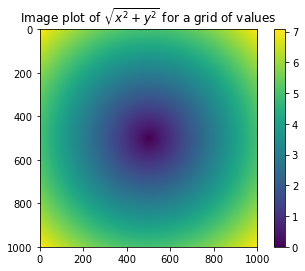

In [63]:
plt.imshow(z)
plt.colorbar()
plt.title('Image plot of $\sqrt{x^2+y^2}$ for a grid of values')
plt.show()

### 将条件逻辑表述为数组运算

若要根据cond中的值选取xarr和yarr的值：当cond的值为True时，选取xarr的值，否则从yarr中选取：

In [64]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [65]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

上面的写法有两个问题：第一，它对大数组的处理速度不是很快。第二，无法用于多维数组。

若使用np.where()，则可以解决这个问题：

In [66]:
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

np.where(condition, x=None, y=None), return elements, either from 'x' or  'y', depending on 'condition'.在数据分析工作中，where通常用于根据另一个数组而产生一个新数组。假设有一个由随机数据组成的矩阵，希望将所有正值替换为2，将所有负值替换为-2

In [67]:
arr = np.random.randn(4, 4)
arr

array([[-0.48452676,  0.63834867, -2.21880111,  0.34409178],
       [-0.59397691, -0.39046119, -0.42903049,  1.22758036],
       [ 0.93507885,  1.34102582, -0.3668334 ,  0.51864402],
       [-0.11217172,  1.16334243,  1.04858301, -0.15764105]])

In [68]:
np.where(arr > 0, 2, -2)

array([[-2,  2, -2,  2],
       [-2, -2, -2,  2],
       [ 2,  2, -2,  2],
       [-2,  2,  2, -2]])

In [69]:
np.where(arr > 0, 2, arr)

array([[-0.48452676,  2.        , -2.21880111,  2.        ],
       [-0.59397691, -0.39046119, -0.42903049,  2.        ],
       [ 2.        ,  2.        , -0.3668334 ,  2.        ],
       [-0.11217172,  2.        ,  2.        , -0.15764105]])

传递给where的数组大小可以不相等（但得符合广播得规则），甚至可以时标量值。

稍微动动脑子，就能用where表达出更复杂得逻辑。<br />
比如这个例子，有两个布尔型数组cond1和cond2，希望根据4种不同得布尔值组合实现不同得赋值操作：

In [ ]:
result = []
for i in range(n):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)

上面得结构可以改写成一个嵌套where表达式：

In [ ]:
np.where(cond1 & cond2, 0, np.where(cond1, 1, np.where(cond2, 2, 3)))

“布尔值可以当成0和1来计算”，上面的例子还能改写成这样：

In [ ]:
result = 1 * (cond1 - cond2) + 2 * (cond2 & -cond1) + 3 * -(cond1 | cond2)

### 数学和统计方法

可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。

In [71]:
arr = np.random.randn(5, 4)
arr

array([[ 0.76935996,  2.4968374 , -1.39257146, -0.96850467],
       [-0.72683996,  0.14603376,  0.97414114, -0.7050452 ],
       [-0.82647495, -0.71497932,  1.18045777,  0.95871187],
       [ 0.70270315,  0.21264291,  0.05878333, -0.61374789],
       [ 2.03215155, -1.23496296,  1.36249698,  0.12631463]])

以下两种调用是等价的:

In [72]:
arr.mean()

0.1918754018132196

In [73]:
np.mean(arr)

0.1918754018132196

In [74]:
arr.sum()

3.8375080362643921

In [75]:
np.sum(arr)

3.8375080362643921

mean, sum这类函数可以接受一个axis参数，来计算给定轴上的统计值

In [76]:
arr.mean(axis=1)

array([ 0.22628031, -0.07792757,  0.14942884,  0.09009537,  0.57150005])

In [77]:
arr.mean(axis=0)

array([ 0.39017995,  0.18111436,  0.43666155, -0.24045425])

元素累加cumsum和元素累积cumprod的计算结果不聚合，而是产生一个由中间结果组成的数组：

In [78]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [79]:
arr.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [80]:
np.cumprod(arr, axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### 用于布尔型数组的方法

在上边的方法中，布尔值会被强制转换成1和0.因此sum经常被用来对布尔型数组种的True值计数：

In [81]:
arr = np.random.randn(100)
(arr > 0).sum()

50

any用于测试数组种是否存在True，all判断数组中是否全是True。

### 排序

In [82]:
arr = np.random.randn(8)
arr

array([ 0.30840459, -2.30322073,  0.45160718,  0.54860177, -1.40373835,
       -0.51819834, -0.02894377, -0.49793003])

In [84]:
arr.sort()
arr

array([-2.30322073, -1.40373835, -0.51819834, -0.49793003, -0.02894377,
        0.30840459,  0.45160718,  0.54860177])

也可以在给定轴向上进行排序：

In [89]:
arr = np.random.randn(5, 3)
arr_copy = arr.copy()
arr

array([[-0.32305464,  0.79176928,  0.81407477],
       [ 0.65735795, -0.82606557,  0.72080858],
       [-1.22637379,  1.15098919, -0.48256663],
       [ 0.06881945, -0.08630028, -0.07707118],
       [ 1.08397466,  0.03716755, -0.70125075]])

In [91]:
arr_copy.sort()
arr_copy

array([[-0.32305464,  0.79176928,  0.81407477],
       [-0.82606557,  0.65735795,  0.72080858],
       [-1.22637379, -0.48256663,  1.15098919],
       [-0.08630028, -0.07707118,  0.06881945],
       [-0.70125075,  0.03716755,  1.08397466]])

In [94]:
arr_copy.sort(0)
arr_copy

array([[-1.22637379, -0.48256663,  0.06881945],
       [-0.82606557, -0.07707118,  0.72080858],
       [-0.70125075,  0.03716755,  0.81407477],
       [-0.32305464,  0.65735795,  1.08397466],
       [-0.08630028,  0.79176928,  1.15098919]])

顶级方法np.sort()返回的是数组的已排序副本，而self.sort()则会修改self本身。<br />
计算数组**分位数**最简单的办法是对其进行排序，然后选取特定位置的值：

In [95]:
larg_arr = np.random.randn(10000)
larg_arr.sort()
larg_arr[int(0.05 * len(larg_arr))]  # 5% 分位数

-1.6328192295773625

### 唯一化以及其他的及和逻辑

这部分看书106页，没啥难理解的。<br />
主要函数unique(x), intersect1d(x, y), union1d(x, y), in1d(x, y), setdiff1d(x, y), setxor1d(x, y)(对称差)

# NumPy高级应用

### NumPy数据类型体系

因为浮点数的种类很多，判断dtype是否属于某个大类的工作非常繁琐。幸运的是，dtype都有一个超类，它们可以跟np.issubdtype函数结合使用。

In [3]:
ints = np.ones(10, dtype=np.uint16)
floats = np.ones(10, dtype=np.float32)
np.issubdtype(ints.dtype, np.integer)

True

In [4]:
np.issubdtype(floats.dtype, np.floating)

True

调用dtype的mro方法可以查看其所有父类：

In [6]:
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

## 高级数组操作

### 数组重塑

In [7]:
arr = np.arange(8)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [8]:
arr.reshape((4, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [17]:
arr = np.arange(24).reshape((4, -1))  # -1代表自适应
arr

array([[[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]],


       [[[12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23]]]])

In [18]:
other_arr = np.ones((2, 2, 2, 3))
other_arr

array([[[[ 1.,  1.,  1.],
         [ 1.,  1.,  1.]],

        [[ 1.,  1.,  1.],
         [ 1.,  1.,  1.]]],


       [[[ 1.,  1.,  1.],
         [ 1.,  1.,  1.]],

        [[ 1.,  1.,  1.],
         [ 1.,  1.,  1.]]]])

In [19]:
arr.reshape(other_arr.shape)

array([[[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]],


       [[[12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23]]]])

从多维数组转换为一维数组的运算称为扁平化(flattening)或散开(raveling)

In [20]:
arr.ravel()  # ravel一般不会产生源数据的副本

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [21]:
other_arr.flatten()  # 总是会产生一个源数据的副本

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

### C和Fortran顺序

像reshape和reval这样的函数可以接受一个表示数组数据存放顺序的order参数。'F'代表Fortran列优先，'C'代表C语言行优先。

In [22]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
arr.ravel('C')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [24]:
arr.ravel('F')

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

二维或更高维数组的重塑比较令人费解，C和Fortran的主要区别就是维度进行的顺序。<br />
C/行优先：先经过高的维度。<br />
Fortran/列优先：先经过低的维度。

### 数组的合并与拆分

np.concatenate方法可以按指定轴将一个由数组组成的序列（如元组/列表等）连接到一起。

In [26]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])
np.concatenate((arr1, arr2), axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [27]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [28]:
np.vstack((arr1, arr2))  # vertical stack

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [29]:
np.hstack((arr1, arr2))  #horizontal  stack

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

相反地，split用于将一个数组沿指定轴拆分为多个数组：

In [31]:
arr = np.random.randn(5, 2)
arr

array([[ 0.72223108,  0.49569112],
       [-1.64078293, -1.22244832],
       [-0.72638337, -0.25897447],
       [ 0.60869256, -1.16472271],
       [ 0.5078986 , -0.52661282]])

In [39]:
first, second, third = np.split(arr, [1, 3], axis=0)  # axis=0时只返回3个正常数组
first

array([[ 0.72223108,  0.49569112]])

In [54]:
np.split(arr, [1, 2], axis=1)  # axis=1时，多返回一个空数组，为什么

[array([[ 0.72223108],
        [-1.64078293],
        [-0.72638337],
        [ 0.60869256],
        [ 0.5078986 ]]), array([[ 0.49569112],
        [-1.22244832],
        [-0.25897447],
        [-1.16472271],
        [-0.52661282]]), array([], shape=(5L, 0L), dtype=float64)]

|**函数**|**说明**|
|--------|---------|
|concatenate|最一般化地连接，沿一条轴连接一组数组|
|vstack, row_stack|以面向行地方式对数组进行堆叠（沿0轴）|
|hstack|以面向列地方式对数组进行堆叠（沿1轴）|
|column_stack|类似于hstack，但是会先将一维数组转换为二维列向量|
|dstack|以面向深度地方式对数组进行堆叠（沿2轴）|
|split|沿特定轴在指定位置拆分数组|
|hsplit, vsplit, dsplit|分别沿0轴，1轴，2轴进行拆分|